# Playground Mining : Understanding NBA Teams's Identity

Sports analytics are booming in the sport professional world, whether it focuses on team or individual sports, and on the amenities, on media, commercial strategy,…

Team sports in general are really extremely complex to analyse, and more specifically basketball: the play reaches a certain level of complexity, because most of the time all five players find its role through the action taking place, may they have touched the ball, or not. They all contribute to the outcome of the game. The NBA, since a few years now, it is setting up cameras and developing artificial intelligence to collect, store and analyse a large number of data both on plays and players.

For a few years now data is analysed in order to define "play type". They are really interesting to understand teams strategies and games. Unfortunately, european basketball seems a little bit late on those capital studies and I find it an opportunity to analyze its game in this article and the many others to come. There is, in fact a significant difference between NBA and european basketball, although some NBA teams are getting closer and closer to european style with the increase in the number of european players and european coaches. The questions I am not answering because there is no enough data on european championships are : How can we characterize games to define teams' play style and can we define some of them for the european championships ? The NBA's game evolution throughout the decades since the game statistics are stored could also be parsed using data analysis and machine learning.


Speed, 3-points-shooting and pick and roll plays : this is what characterize the best the all current NBA. Through from the NBA, a multitude of different play types and styles emanate over time and get closer to european style on delayed game (offense). Some of them often even define all the team, such as the San Antonio Spurs, one which is well known for its rapid movement of the ball. In this article, I attend to show the result of my work on data that I gathered from the NBA official web site and my analysis of those results. I will characterize the game styles or identity of NBA teams.

## Classifiate and build the Model

### Imports

For the recall, my study aims at assembling teams by their game style. A group will be named cluster and to create a cluster I have to use unsupervised algorithm. I am using KMeans method and extracting libraries in order to classify.

In [1]:
#Files Library
import os

#Datavisualization Library
import matplotlib.pyplot as plt

#Maths and Matrix Libraries
import numpy as np 
import pandas as pd

#Machine Learning - Unsupervised Model Libraries
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

### Loading Data 

The data I decided to use is loaded from the official website of the NBA (section Teams - Play Type). I based my study on the former seasons, that is to say from 2015–2016 to 2018–2019.  The data highlights 11 play types, being: Transition, Isolation, Pick & Roll Ball Handler (P&R_BH), Pick & Roll Roll Man (P&R_RM), Post up, Spot up (Catch and Shoot), Handoff, Cut, Off Screen, Putbacks, Misc. I had access to data from a few NBA regular seasons, though I wish I had access to 2012–2015 NBA seasons data which contains information on the San Antonio Spurs that have a game style that I love that is a quite european style. When I started my work, I could already predict a few things. First, all of the NBA teams would have a high percentage in transition, pick and roll ball handler and spot up. Second, the Houston Rockets (with James Harden) would record a high percentage of isolation. Last but not least, I could not wait to see what the data could say about the Golden States Warriors on the period 2015–2019 (with its 3 snipers Stephen Curry, Klay Thompson and Kevin Durant)

In [2]:
#Open the folder where is the file
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA/Databases")

# Read data from file 'Teams_Play_Types_Synthesis.xlsx' 
Data = pd.read_excel("Teams_Play_Types_Synthesis_2015_2019.xlsx") 

#Drop first column to use only numerical features during the clustering processus
Data_value = Data.drop('TEAM - SEASON', 1)

# Preview the first 5 lines of the loaded data
Data.head()

,TEAM - SEASON,TRANSITION,ISOLATION,P&R_BH,P&R_RM,POST_UP,SPOT_UP,HANDOFF,CUT,OFF_SCREEN,PUTBACKS,MISC
0,Atlanta Hawks 2015-2016,14.9,5.6,16.7,8.6,5.7,21.0,4.3,8.4,6.1,3.4,5.3
1,Atlanta Hawks 2016-2017,12.9,6.0,17.7,7.1,6.2,19.6,4.4,7.7,6.5,5.5,6.4
2,Atlanta Hawks 2017-2018,12.0,5.6,21.7,7.7,1.2,20.8,5.8,6.6,8.3,4.7,5.8
3,Atlanta Hawks 2018-2019,17.3,3.7,19.5,6.6,2.8,22.0,6.9,6.9,2.3,6.1,5.9
4,Boston Celtics 2015-2016,16.3,5.2,14.3,7.3,5.9,19.9,6.6,6.8,6.1,5.6,6.0


### Number of Clusters : The Elbow Method 

The first and fundamental thing to do on any unsupervised algorithm is to determine the optimal number of clusters name k, hence the use here of the elbow method, one of the most popular method to determine the number of clusters.

As its name suggests, the method consists in building a graph with an algorithm detailed below and localize an elbow in it to determine the number of cluster k. This elbow illustrates a distortion which is calculated as the average of the squared distance from the clusters center of the respective clusters using Euclidian distance metric (detail on this site).

In this case, the number of cluster k seems quite hard to determine. Indeed, on the graph we cannot clearly identify an elbow. Some extensive researches led to the conclusion that 7 clusters were the most relevant choice, regarding of the play types it seemed to highlight which I knew was obviously going to be (isolation, pick and roll ball handler used a lot by the Houston Rockets)

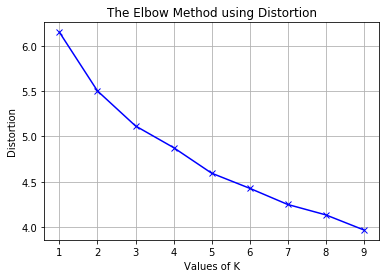

In [3]:
#Building the clustering model and calculating the values of the Distortion and Inertia
distortions = [] 

K = range(1,10) 

for k in K: 
    #Building and fitting the model - Variation of the number of clusters k (from 1 to 10)
    kmeanModel = KMeans(n_clusters=k).fit(Data_value) 
    kmeanModel.fit(Data_value)
    
    #Measure of the distortion for k clusters
    distortions.append(sum(np.min(cdist(Data_value, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / Data_value.shape[0])

#Build Classic x/y Graph with x the value of k the number of clusters and y the distortion measured
fig, ax = plt.subplots()

ax.plot(K, distortions, 'bx-')
ax.set(xlabel='Values of K', ylabel='Distortion',
       title='The Elbow Method using Distortion')
ax.grid()
 
plt.show()

In [6]:
#Saving the Elbow Method for Teams's Play Types
fig.savefig("Elbow_Method_Teams_s_Play_Types.png")

### Unsupervised Classification : KMeans Model 

Team sports in general, and above all basketball, areall about adapting the strategy to the opponent, but always staying loyal to the team spirit. As I am trying for now to identify teams styles, I will not go any further about how specific teams can adapt its game. I would rather add a little disclaimer: of course, each game is different, and spontaneous and inspired moves and actions during a game would never be entirely described by a mathematical algorithm.

Clustering is all about gathering elements, teams for example, in a multidimensional world (one for every 11 play types) and create groups, that is to say clusters, with the elements that are the closest to others.

[For the bravous one, here is the link to more detail on the mathematical principle and formulas used to calculate the distance between elements and create cluster with KMeans method]

In [4]:
#Fit (create) your clusters and predict all years since Season 2015-2016 with kmeans model
Kmeans_7 = KMeans(n_clusters=7, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
Pred_All_Years = Kmeans_7.fit_predict(Data_value)

In [5]:
#Open the folder where I want to put the files of Output
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")

#Add Archetype model to Data and store it in an Excel File 
Data['Archetype'] = Pred_All_Years

Data.head()

,TEAM - SEASON,TRANSITION,ISOLATION,P&R_BH,P&R_RM,POST_UP,SPOT_UP,HANDOFF,CUT,OFF_SCREEN,PUTBACKS,MISC,Archetype
0,Atlanta Hawks 2015-2016,14.9,5.6,16.7,8.6,5.7,21.0,4.3,8.4,6.1,3.4,5.3,6
1,Atlanta Hawks 2016-2017,12.9,6.0,17.7,7.1,6.2,19.6,4.4,7.7,6.5,5.5,6.4,1
2,Atlanta Hawks 2017-2018,12.0,5.6,21.7,7.7,1.2,20.8,5.8,6.6,8.3,4.7,5.8,2
3,Atlanta Hawks 2018-2019,17.3,3.7,19.5,6.6,2.8,22.0,6.9,6.9,2.3,6.1,5.9,2
4,Boston Celtics 2015-2016,16.3,5.2,14.3,7.3,5.9,19.9,6.6,6.8,6.1,5.6,6.0,3


In [ ]:
#Extraction to the 7 Clusters Model to Excel File
Data.to_excel('Teams_s_Play_Types_7_Cluster.xlsx')

### Results 

#### Tableau fait sur 'Teams_s_Play_Types_7_Cluster_bis.xlsx'

The analysis of the results being very subjective, I will share my own point of view. Of course, you might have another opinion, which I would be glad to hear about in the comments. As said before and seen on the data extraction there are 11 play types and 7 clusters. The large number of it leads me to study them by groups of 2 or 3 that are significantly close. I will also illustrate those 7 clusters with the teams that are 3 or 4 times in the same clusters what is significant for game identity.


First, I attend to talk about the following clusters : Pick and roll ball handler NBA style teams (cluster 0), Big men post up NBA style teams (cluster 3), Penetration NBA 'old school' style teams (cluster 6). Those three clusters build their offenses play intransition, pick and roll ball handler and spot up, as the NBA classic typical teams that I mentioned previously. The difference lays on the use of isolation, post up and cut play. The pick and roll ball handler NBA style teams contain Portland, which uses a lot of isolation and pick and roll ball handler for Damian Lillard or CJ McCollum, and LA Clippers. Those teams are also the one using the most pick and roll ball handler in the NBA at this time.
Teams using a lot the post up play are the one formed with big people that can play back to the basket such Joël Embiid, Nikola Jokic, Brook Lopez and Giannis Antetokoumpo respectively playing for Philadelphia, Denver and Milwaukee for Lopez and the MVP 2019. Those teams are members of the cluster named big men post up NBA style.
Finally yet importantly, the third cluster, penetration NBA 'old school' style teams, equally between the 3 play types defining the NBA clusters, although it's using a bit less spot up play (catch and shoot) for benefit of penetration plays (isolation, pick and roll roll man and cut). This type of teams gather among Indiana and Oklahoma. This cluster is very close to 'old school' NBA teams and also close to european style teams that we will see below, but it uses more transition and speed than european style.

The second group of clusters I would personally want to develop contains two clusters that gather teams that have the closest way from European. Indeed, they use less transitions and fast plays than their counterparts from the NBA. Speaking about European basketball type, it is relevant to visualize the San Antonion Spurs, hence the beginning of this analyse with the cluster Post up European style teams (cluster 1). This style offensive, balanced and offers many possibilities. It uses catch and shoot (named spot up), pick and roll ball handler, although the other play types are quite well balanced, their percentage of frequency during the game picking from 4 to 13%, with 4 play type between 7% and 13%. This is the biggest cluster in terms of number of teams, gathering San Antonio, Minnesota, Memphis, Dallas and New York between 2015 and 2019.

The second cluster uses pick and roll up to 25% of their game, and have fast guards and big people to make the screens : this cluster gathers Utah, Charlotte and Miami. The center of those teams is a big and often uses to make alley oop after the screen, there is the reason why I decided to call this cluster Pick and roll alternation European style teams.

The particularity of each of these two last clusters forming the third group is that a one and only team represent them. The first one bases its game on fast play, small ball and isolation, and though I guess you already know which team I am talking about… Houston ! Not very surprising, their coach Mike D'Antoni said he wanted the Rockets play in '6 second or less' with the arrival of Russel Westbrook. However, between 2015 and 2019, the mind-set stayed still and they used play fast, building the game around James Harden's offensive skills. I personally hate watching this type of game as European but well, certainly it is a strategy that gets some good results such Western Conference finalist in 2018.

Finally yet importantly, second cluster 'third group' : Golden State Warriors, with their unique game. More important the key players Stephen Curry, Kevin Durant, and Klay Thompson, those play a lot spot up, but a lot more transition and particularly less pick and roll. Between 2015 and 2019, the Golden State Warriors is the team using the most ball movement and screens without the ball that why the study shows that this team is the one with the highest percentage of cut and off screen plays. I would have loved to be able to get the data to compare this team to the San Antonio Spurs between 2012 and 2015.

You would be right if you would tell me I have not talk about all NBA teams. As a matter of fact, I decided to focus on teams, which were three, or four times in the cluster during the last 4 seasons. Of course, the game offensive style changes depending on the players and I will dedicate the following paragraphs to the classification of the teams in the current season.

## Visualization of the different Game Styles

In [2]:
#Files Library
import os

#Maths and Matrix Libraries
import numpy as np 
import pandas as pd

#Datavisualization Library
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [3]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [4]:
#Open the folder where are the files
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")

# Read data from file 'Play_Type_7_Clusters_Analysis.xlsx' 
Data_Visualization_Type = pd.read_excel("Play_Type_7_Clusters_Analysis.xlsx")

#Select the Labels of the Archetype
labels = Data_Visualization_Type['ARCHETYPE']

#Drop first column to use only numerical features during the clustering processus (df is the matrix that we will use in the )
Data_Play_Type_ArcheTypes = Data_Visualization_Type.drop('ARCHETYPE', 1)


###  Visualization Game Identity by Archetype - All Team

The radar chart seems like the best type of graphic to visualize the use of all play types by each cluster. The fact that this graph represents seven clusters makes the reading a little bit tough however, it highlights that many clusters are very close.

Gregg Popovich said not long time ago that the NBA was more and more boring on their game style and that each team copies each other. Those types of statistics and graphics prove him right on the offensive teams' styles, although the Houston Rocket and the Golden State differ to other teams.

On the defensive side, I really love what is making the head coach of the Toronto Raptors with many changes in defensive play types, while other teams use man-to-man defense for most of the time. It could make an interesting subject of analysis with more statistics on defensive plays.

In [5]:
Data_Play_Type_ArcheTypes_Value = Data_Play_Type_ArcheTypes.values
data = [['Visualization Game Identity by Archetype - All Team', Data_Play_Type_ArcheTypes_Value.tolist()]]

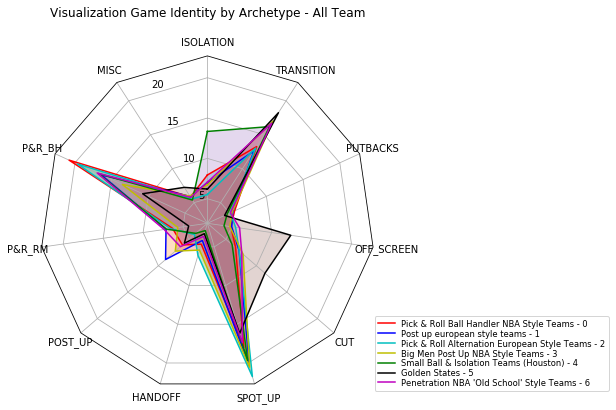

In [6]:
N = len(Data_Play_Type_ArcheTypes_Value[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes.columns
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

colors = ['r', 'b', 'c', 'y', 'g', 'k', 'm']

for d, color in zip(case_data, colors):
    line = ax.plot(theta, d, color=color)
    ax.fill(theta, d, alpha=0.25)
ax.set_varlabels(spoke_labels)

#labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

In [28]:
#Saving 
fig.savefig("Visualization_Game_Identity_by_Archetype.png")

### Visualization Game Identity by Archetype - Old School Team

#### Pas à mettre dans l'article

In [7]:
#
Data_Play_Type_ArcheTypes_OldSchool = Data_Play_Type_ArcheTypes.drop([0,3,4,5,6])

Data_Play_Type_ArcheTypes_Value_OldSchool = Data_Play_Type_ArcheTypes_OldSchool.values
data_oldschool = [['Visualization Game Identity by Archetype - Europeans Style', Data_Play_Type_ArcheTypes_Value_OldSchool.tolist()]]

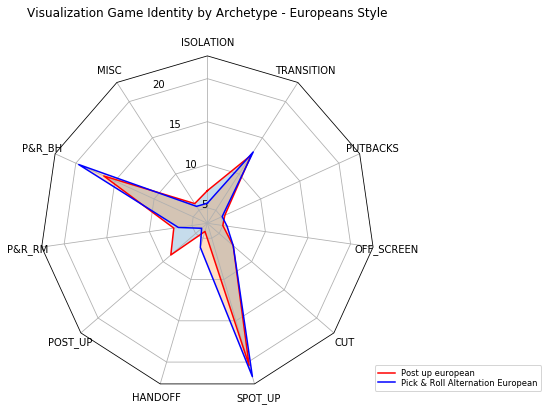

In [9]:
N = len(Data_Play_Type_ArcheTypes_Value_OldSchool[0])
theta_o = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes_OldSchool.columns
title, case_data = data_oldschool[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

colors = ['r', 'b']

for d, color in zip(case_data, colors):
    line = ax.plot(theta, d, color=color)
    ax.fill(theta_o, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

labels_oldschool = ('Post up european', 'Pick & Roll Alternation European')
legend = ax.legend(labels_oldschool, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

### Visualization Game Identity by Archetype - European Team

In [11]:
#
Data_Play_Type_ArcheTypes_European = Data_Play_Type_ArcheTypes.drop([0,2,3,4,5])

Data_Play_Type_ArcheTypes_Value_European = Data_Play_Type_ArcheTypes_European.values
data_european = [['Visualization Game Identity by Archetype - Post up european x penetration NBA old school ', Data_Play_Type_ArcheTypes_Value_European.tolist()]]

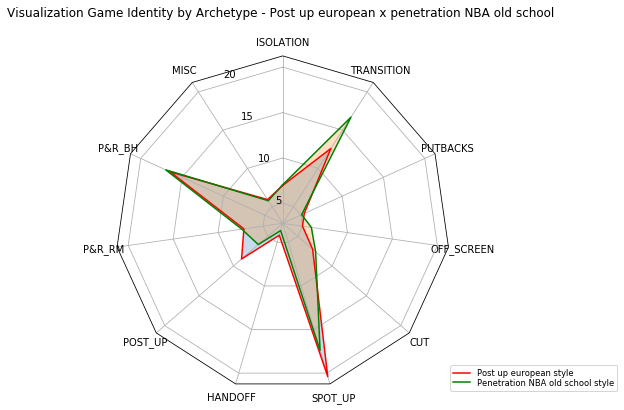

In [12]:
N = len(Data_Play_Type_ArcheTypes_Value_European[0])
theta_e = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes_European.columns
title, case_data = data_european[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

colors = ['r', 'g']

for d, color in zip(case_data, colors):
    line = ax.plot(theta, d, color=color)
    ax.fill(theta_e, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

labels_european = ('Post up european style', 'Penetration NBA old school style')
legend = ax.legend(labels_european, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

In [16]:
#Saving 
fig.savefig("Visualization_European_Postup_x_Old_School_Alternation.png")

## Classification for 2019

In [5]:
#Open the folder where are the files
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA/Databases")

# Read data from file 'Teams_Play_Types_Synthesis.xlsx' 
Data_2019 = pd.read_excel("Teams_Play_Types_Synthesis_2019_2020.xlsx")

#Drop first column to use only numerical features during the clustering processus (df is the matrix that we will use in the )
Data_Play_2019 = Data_2019.drop('TEAM - SEASON', 1)

In [6]:
#Make prediction for Season 2019-2020 with the model created abrove
Pred_2019 = Kmeans_7.predict(Data_Play_2019)

Data_2019['Archetype'] = Pred_2019

In [8]:
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")
Data_2019.to_excel('Teams_s_Play_Types_2019_Pred.xlsx')

## How NBA Teams can use those Type of Data 